**Name**: Vaibhav Bansal \
**Registration Num.**: 229310063 \
**Class and Section**: 5E \
**Lab Experiment(s)**: _from_ 1 _till_ 7

Experiment 1 : Data Cleaning & EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
data = pd.read_csv("/content/data.csv")

In [ ]:
data.head(5)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [ ]:
data.shape

(10, 4)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
data.head(2)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes


In [ ]:
data.tail(2)

,Country,Age,Salary,Purchased
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
data.isnull().sum()

,0
Country,0
Age,1
Salary,1
Purchased,0


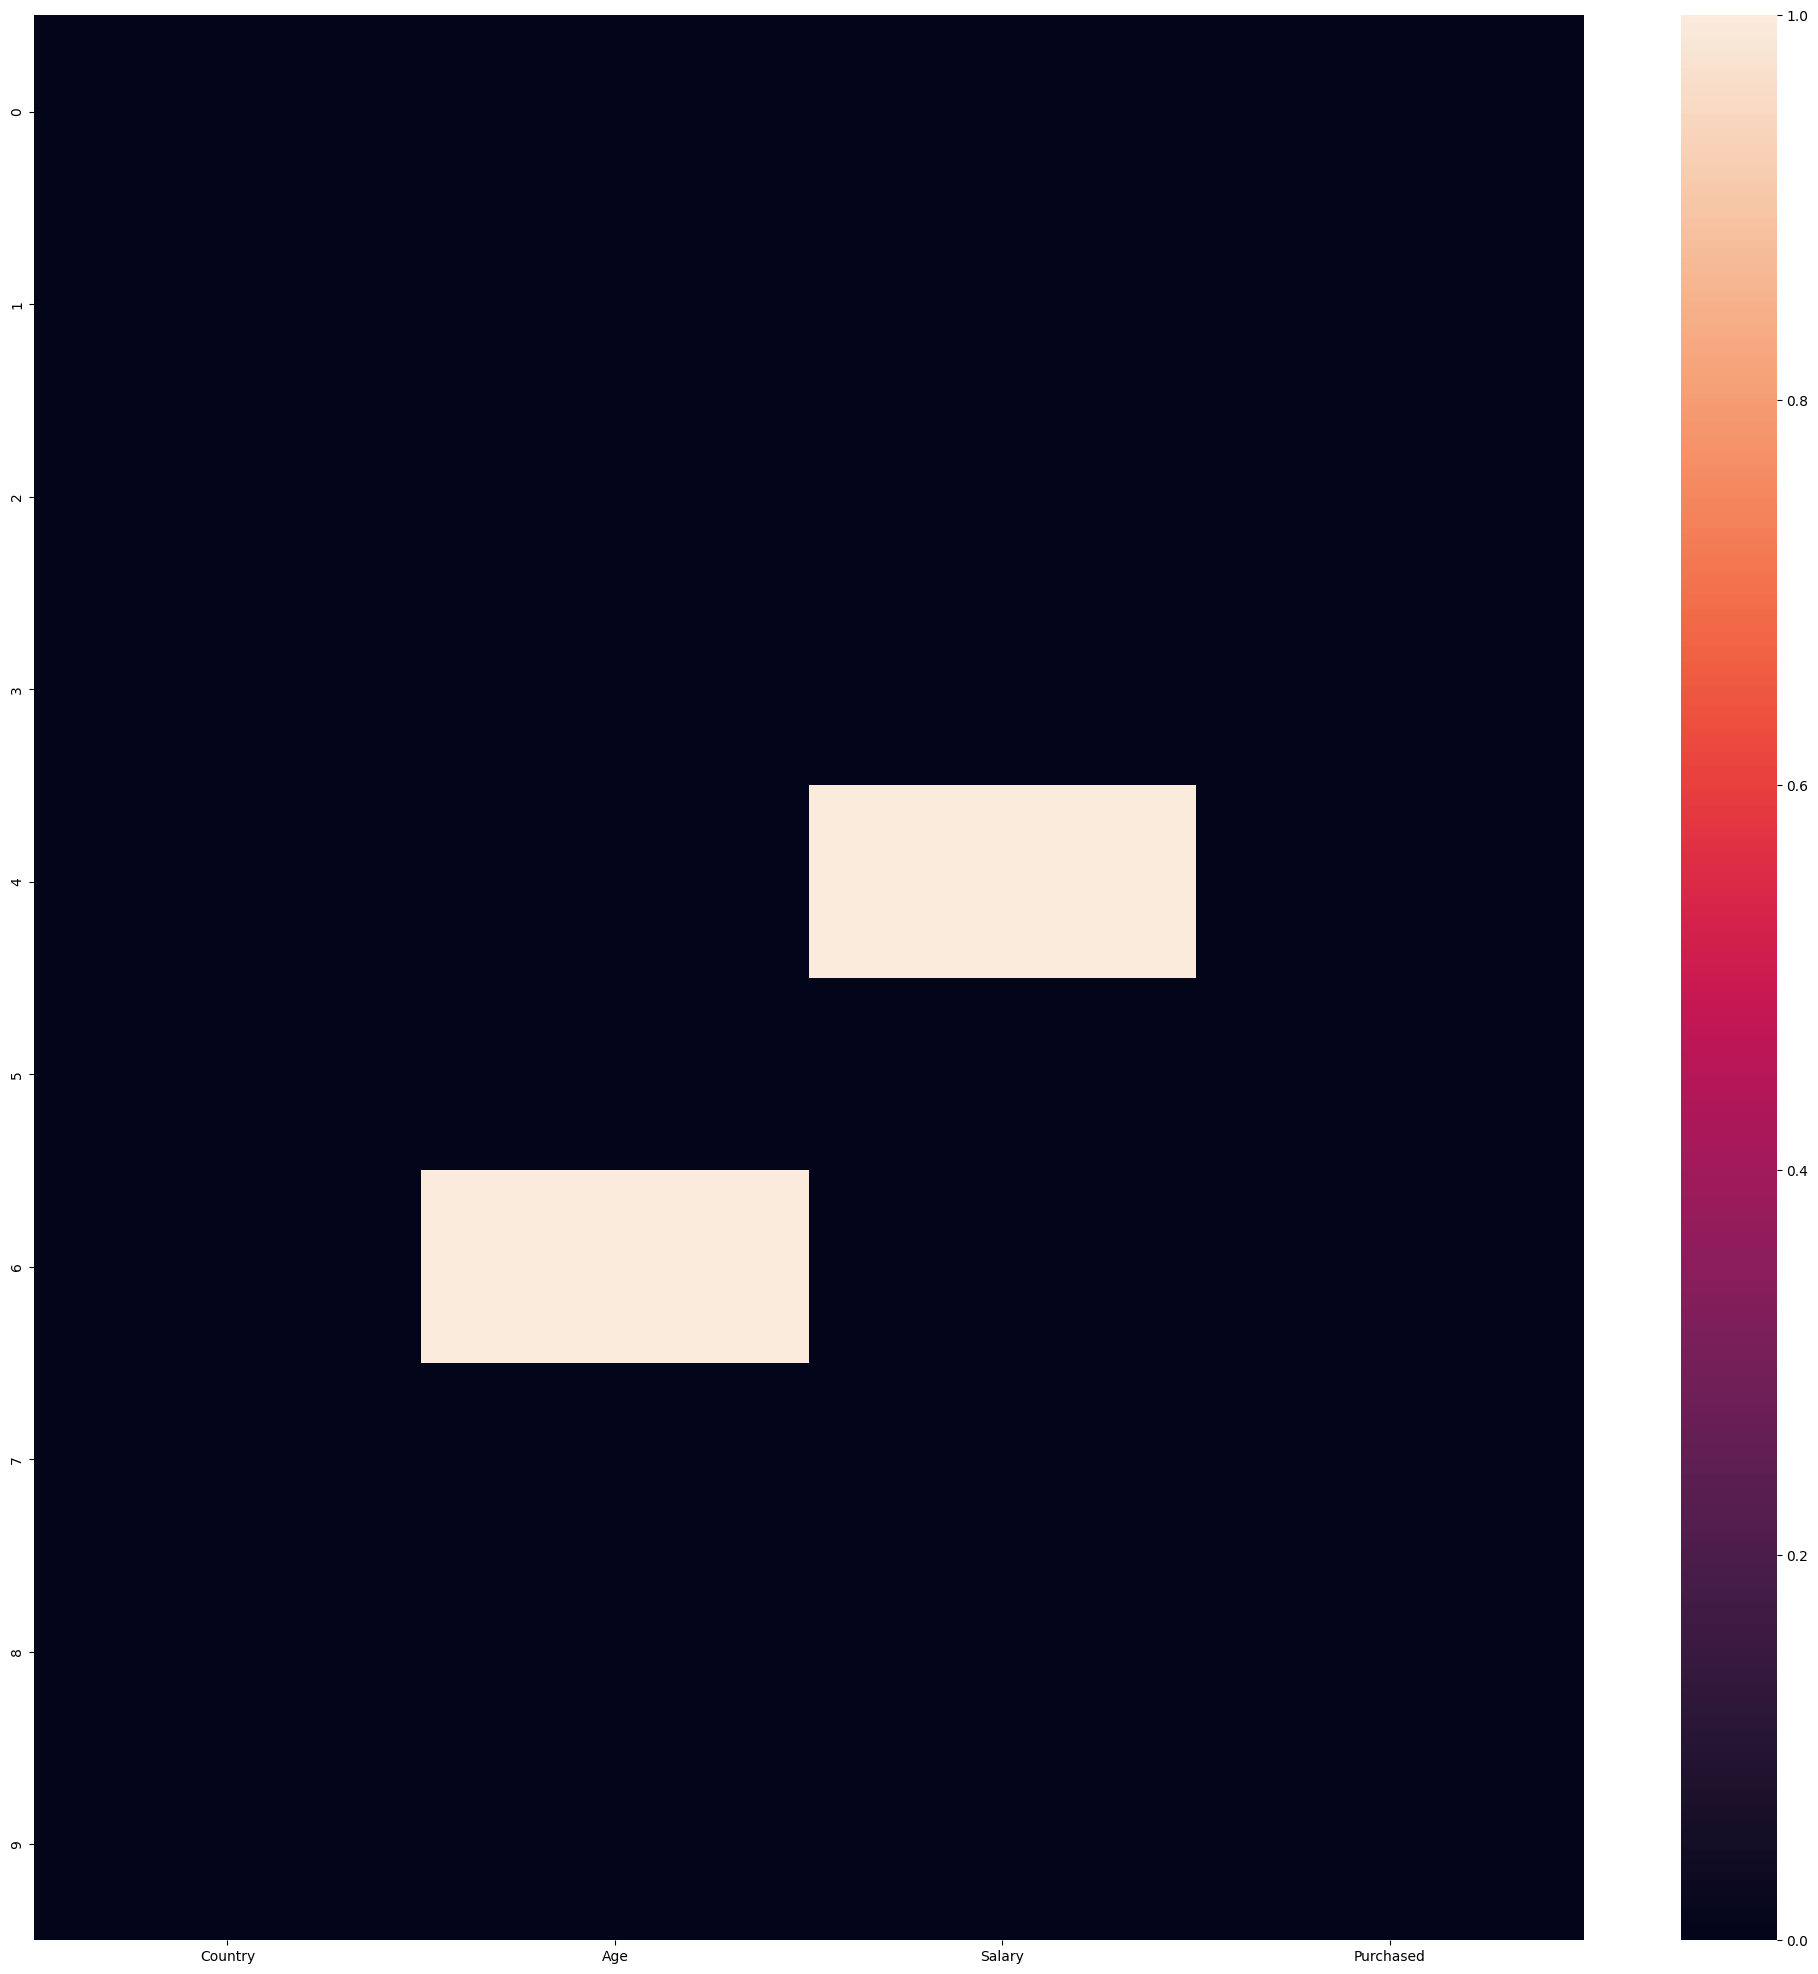

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(data.isnull())
plt.show()

In [ ]:
missing_value_percent = data.isnull().sum() / data.shape[0] * 100
print(missing_value_percent)

Country       0.0
Age          10.0
Salary       10.0
Purchased     0.0
dtype: float64


In [ ]:
missing_value_column = missing_value_percent[missing_value_percent > 17].keys()
print(missing_value_column)

Index([], dtype='object')


In [ ]:
data1 = data.drop(columns = missing_value_column)

In [ ]:
data1.shape

(10, 4)

In [ ]:
data2 = data1.dropna()

In [ ]:
data2.shape

(8, 4)

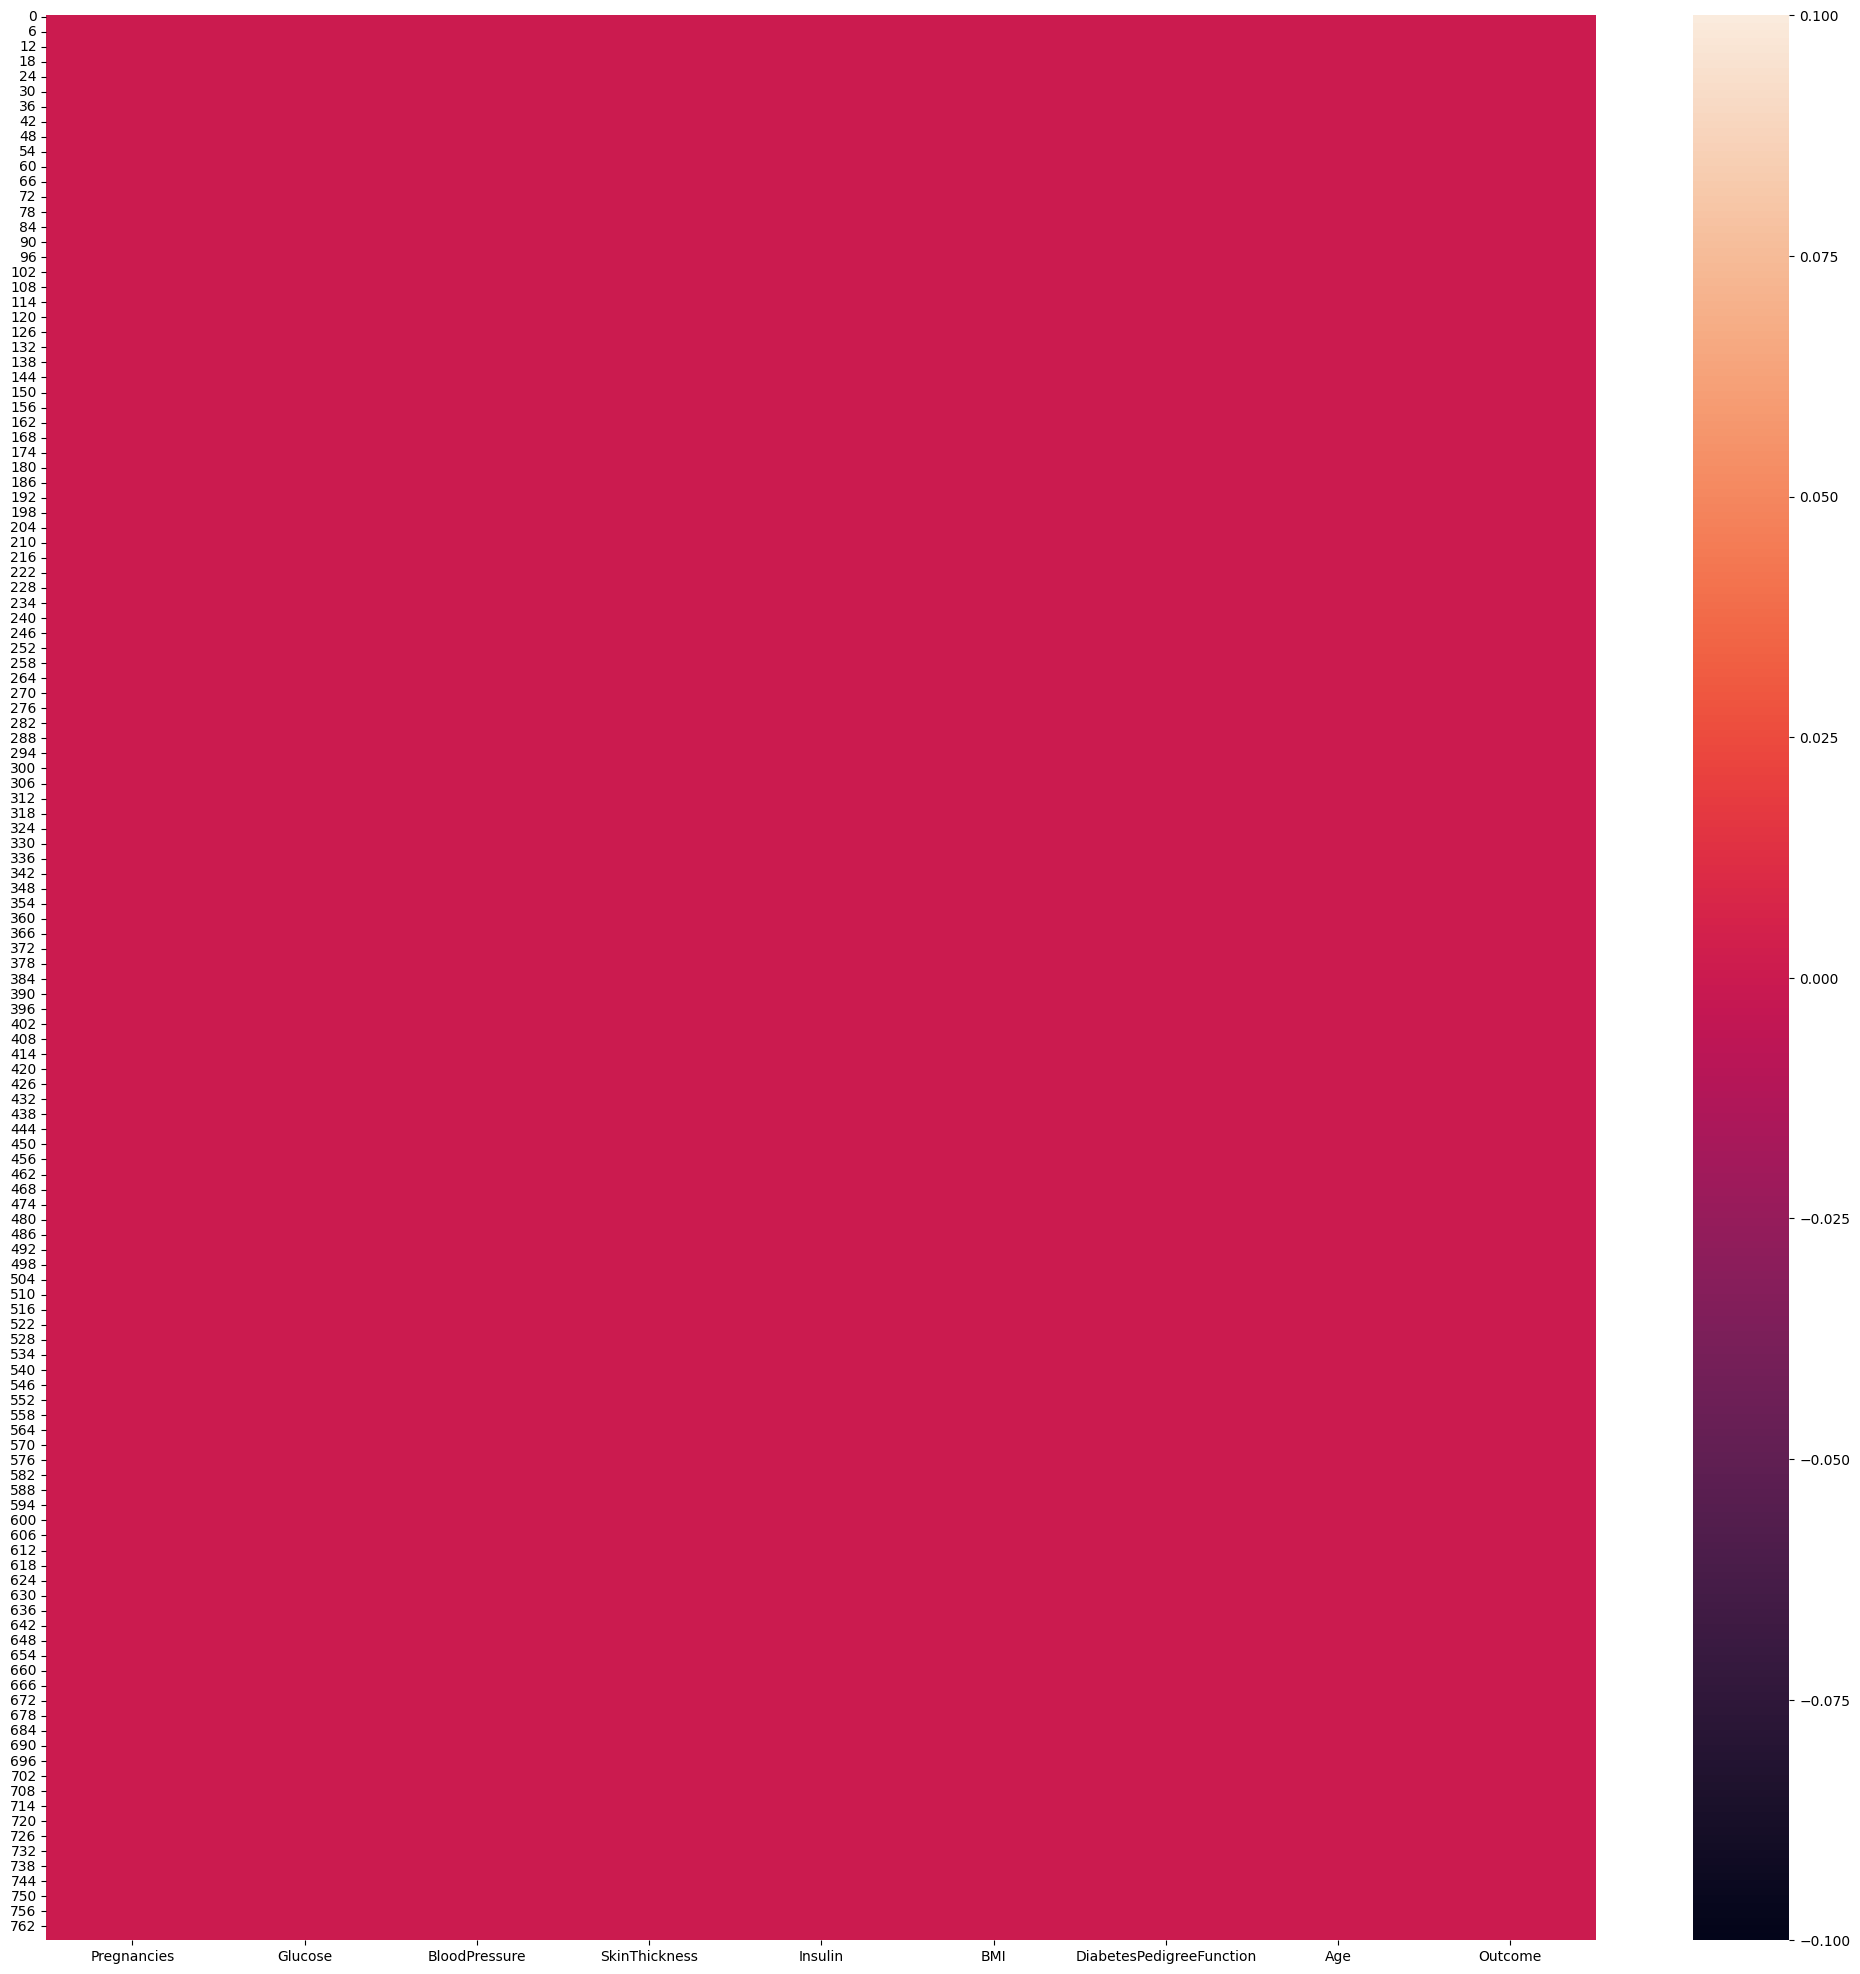

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(data1.isnull())
plt.show()

In [ ]:
data2.isnull().sum().sum()

0

Experiment 2: Outliers estimation & Plot it through violen/whisker

In [ ]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
diabetics = load_diabetes()

# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
print(df_diabetics.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


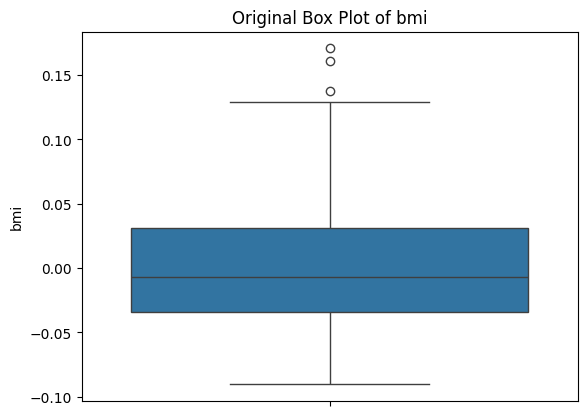

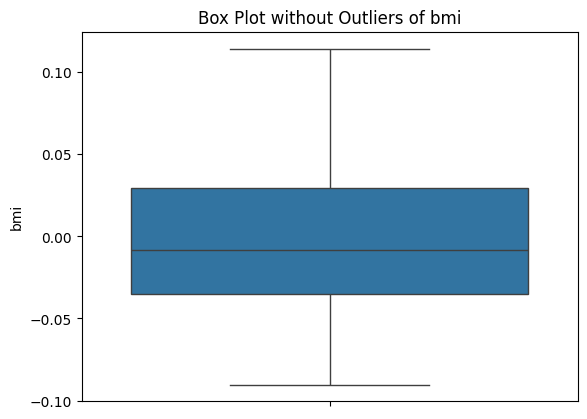

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 0.12

no_outliers = removal_box_plot(df_diabetics, 'bmi', threshold_value)


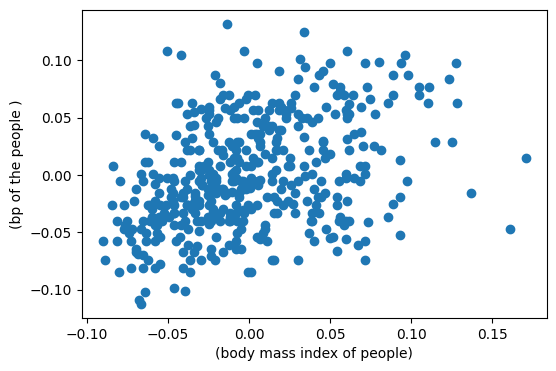

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_diabetics['bmi'], df_diabetics['bp'])
ax.set_xlabel('(body mass index of people)')
ax.set_ylabel('(bp of the people )')
plt.show()


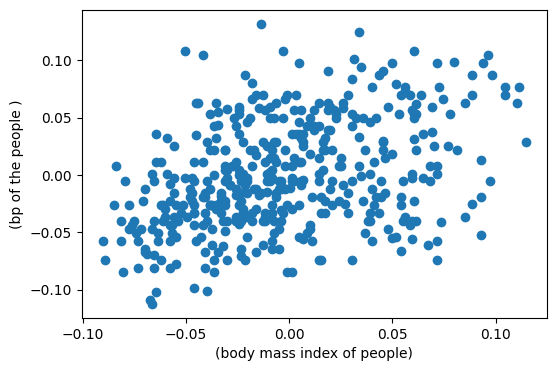

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

outlier_indices = np.where((df_diabetics['bmi'] > 0.12) &
 (df_diabetics['bp'] < 0.8))

no_outliers = df_diabetics.drop(outlier_indices[0])

# Scatter plot without outliers
fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(no_outliers['bmi'], no_outliers['bp'])
ax_no_outliers.set_xlabel('(body mass index of people)')
ax_no_outliers.set_ylabel('(bp of the people )')
plt.show()


In [ ]:
import numpy as np

threshold_z = 2

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df_diabetics.drop(outlier_indices)
print("Original DataFrame Shape:", df_diabetics.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)


Original DataFrame Shape: (442, 10)
DataFrame Shape after Removing Outliers: (426, 10)


In [ ]:
# IQR
Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')
Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)


0.06520763046978838


In [ ]:
# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(df_diabetics['bmi'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(df_diabetics['bmi'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())


Upper Bound: 0.12879000811776306
3
Lower Bound: -0.13204051376139045
0


In [ ]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset
diabetes = load_diabetes()

# Create the dataframe
column_name = diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data)
df_diabetes .columns = column_name
df_diabetes .head()
print("Old Shape: ", df_diabetes.shape)

''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = df_diabetes['bmi'].quantile(0.25)
Q3 = df_diabetes['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_diabetes['bmi'] >= upper)[0]
lower_array = np.where(df_diabetes['bmi'] <= lower)[0]

# Removing the outliers
df_diabetes.drop(index=upper_array, inplace=True)
df_diabetes.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_diabetes.shape)


Old Shape:  (442, 10)
New Shape:  (439, 10)


Experiment 3: Imputation of Missing Values KNN, Interpolation,Min-Max/Z-score.

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd

# import the KNNimputer class
from sklearn.impute import KNNImputer


# create dataset for marks of a student
dict = {'Maths': [80, 90, np.nan, 95],
        'Chemistry': [60, 65, 56, np.nan],
        'Physics': [np.nan, 57, 80, 78],
        'Biology': [78, 83, 67, np.nan]}

# creating a data frame from the list
Before_imputation = pd.DataFrame(dict)
# print dataset before imputation
print("Data Before performing imputation\n", Before_imputation)

# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=2)
After_imputation = imputer.fit_transform(Before_imputation)
# print dataset after performing the operation
print("\n\nAfter performing imputation\n", After_imputation)


Data Before performing imputation
    Maths  Chemistry  Physics  Biology
0   80.0       60.0      NaN     78.0
1   90.0       65.0     57.0     83.0
2    NaN       56.0     80.0     67.0
3   95.0        NaN     78.0      NaN


After performing imputation
 [[80.  60.  68.5 78. ]
 [90.  65.  57.  83. ]
 [87.5 56.  80.  67. ]
 [95.  58.  78.  72.5]]


In [ ]:
import pandas as pd
import numpy as np
a=pd.Series([0, 1, np.nan, 3,4,5,7])
a.interpolate()

,0
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
5,5.0
6,7.0


Experiment 4: Pivot table, Melt function.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

X,y = fetch_openml("autos", version=1, as_frame=True, return_X_y=True)
data = X
data['target'] = y

In [ ]:
pivot = np.round(pd.pivot_table(data, values='price',
                                index='num-of-doors',
                                columns='fuel-type',
                                aggfunc=np.mean),2)
pivot

<ipython-input-2-3c77819066fb>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = np.round(pd.pivot_table(data, values='price',
<ipython-input-2-3c77819066fb>:1: FutureWarning: The provided callable <function mean at 0x7f58e7b6c280> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = np.round(pd.pivot_table(data, values='price',


fuel-type,diesel,gas
num-of-doors,,
four,16432.38,13092.81
two,14350.00,12762.76


In [ ]:
pivot = np.round(pd.pivot_table(data, values='price',
                                index=['num-of-doors', 'body-style'],
                                columns=['fuel-type', 'fuel-system'],
                                aggfunc=np.mean,
                                fill_value=0),2)
pivot

<ipython-input-3-14e7dc7c7159>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = np.round(pd.pivot_table(data, values='price',
<ipython-input-3-14e7dc7c7159>:1: FutureWarning: The provided callable <function mean at 0x7f58e7b6c280> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = np.round(pd.pivot_table(data, values='price',


fuel-type                   diesel      gas                             \
fuel-system                    idi     1bbl     2bbl     4bbl      mfi   
num-of-doors body-style                                                  
four         hatchback     7788.00     0.00  7813.71      0.0      0.0   
             sedan        16328.92  8811.67  7711.19      0.0      0.0   
             wagon        19727.67  7295.00  8028.89      0.0      0.0   
two          convertible      0.00     0.00     0.00      0.0      0.0   
             hardtop      28176.00     0.00  8249.00      0.0      0.0   
             hatchback        0.00  7054.43  6701.67  12145.0  12964.0   
             sedan         7437.00     0.00  7570.00      0.0      0.0   

fuel-type                                              
fuel-system                   mpfi      spdi     spfi  
num-of-doors body-style                                
four         hatchback    10618.00      0.00      0.0  
             sedan        18425.68   9279.00      0.0  
             wagon        14213.42      0.00      0.0  
two          convertible  21890.50      0.00      0.0  
             hardtop      23540.50      0.00      0.0  
             hatchback    14581.50  11479.43  11048.0  
             sedan        21034.00      0.00      0.0

In [ ]:
np.round(pd.pivot_table(data, values='price',
                                index=['body-style'],
                                columns=['num-of-doors'],
                                aggfunc=[np.mean, np.median],
                                fill_value=0),2)

<ipython-input-4-18854bd411ba>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  np.round(pd.pivot_table(data, values='price',
<ipython-input-4-18854bd411ba>:1: FutureWarning: The provided callable <function mean at 0x7f58e7b6c280> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  np.round(pd.pivot_table(data, values='price',
<ipython-input-4-18854bd411ba>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  np.round(pd.pivot_table(data, values='price',
<ipython-input-4-18854bd411ba>:1: FutureWarning: The provided callable <function median at 0

mean             median         
num-of-doors      four       two     four      two
body-style                                        
convertible       0.00  21890.50      0.0  17084.5
hardtop           0.00  22208.50      0.0  19687.5
hatchback      8372.00  10230.79   8073.0   8970.0
sedan         14614.13  14283.00  12555.0   8678.0
wagon         12371.96      0.00  11694.0      0.0

In [ ]:
import pandas as pd
d1 = {"Name": ["Tom", "Jerry", "Spike"], "ID": [1, 2, 3],
      "Role": ["Cat", "Mouse", "Dog"]}
df = pd.DataFrame(d1)
print(df)

df_melted = pd.melt(df, id_vars=["ID"], value_vars=["Name", "Role"])
print(df_melted)

    Name  ID   Role
0    Tom   1    Cat
1  Jerry   2  Mouse
2  Spike   3    Dog
   ID variable  value
0   1     Name    Tom
1   2     Name  Jerry
2   3     Name  Spike
3   1     Role    Cat
4   2     Role  Mouse
5   3     Role    Dog


In [ ]:
#multiple columns as id_vars
df_melted = pd.melt(df, id_vars=["ID", "Name"], value_vars=["Role"])
print(df_melted)

   ID   Name variable  value
0   1    Tom     Role    Cat
1   2  Jerry     Role  Mouse
2   3  Spike     Role    Dog


In [ ]:
#skipping columns in melt function
df_melted = pd.melt(df, id_vars=["Name"], value_vars=["Role"])
print(df_melted)

    Name variable  value
0    Tom     Role    Cat
1  Jerry     Role  Mouse
2  Spike     Role    Dog


Experiment 5: Image normalization (rescale -1,1).


Min value in normalized image: -1.0
Max value in normalized image: 1.0


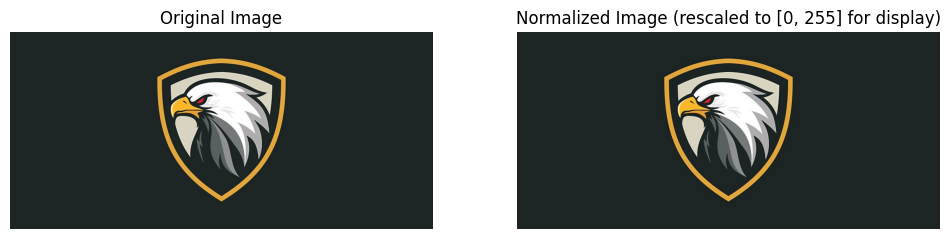

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load an image
image_path = r"/content/mascot-logo-design_P1_900x420.jpg"

try:
    image = Image.open(image_path)
    image = image.convert('RGB')  # Ensure image is in RGB format
except FileNotFoundError:
    print(f"File not found: {image_path}")
    raise
except Exception as e:
    print(f"Error occurred: {e}")
    raise

# Convert image to numpy array
image_array = np.array(image).astype('float32')

# Normalize the image to the range [-1, 1]
normalized_image_array = (image_array / 127.5) - 1

# Verify normalization
print(f"Min value in normalized image: {np.min(normalized_image_array)}")
print(f"Max value in normalized image: {np.max(normalized_image_array)}")

# Convert normalized image back to the range [0, 255] for visualization
denormalized_image_array = (normalized_image_array + 1) * 127.5
denormalized_image_array = denormalized_image_array.astype('uint8')

# Display the original and normalized images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(denormalized_image_array)
axes[1].set_title("Normalized Image (rescaled to [0, 255] for display)")
axes[1].axis('off')

plt.show()


Experiment 6: Linear regression and Logistic regression.


Mean Squared Error: 1.0434333815695171
R^2 Score: 0.7424452332071367


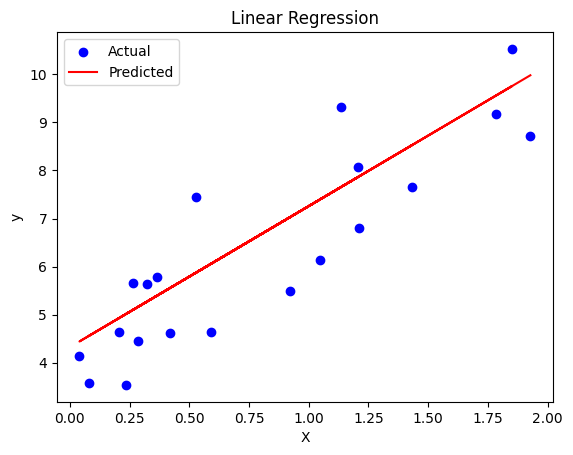

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a synthetic dataset for linear regression
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

# Create and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.show()


Experiment 7: Hypothesis testing (1 way ANOVA).


In [ ]:
import numpy as np
from scipy.stats import f_oneway

# Generate sample data for three groups
np.random.seed(0)
group1 = np.random.normal(20, 5, 30)
group2 = np.random.normal(22, 5, 30)
group3 = np.random.normal(19, 5, 30)

# Perform one-way ANOVA
F_statistic, p_value = f_oneway(group1, group2, group3)

print(f"F-statistic: {F_statistic}")
print(f"P-value: {p_value}")

# Significance level
alpha = 0.05

# Decision
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant diff.")

F-statistic: 4.588157626753169
P-value: 0.012753331593793025
Reject the null hypothesis: There is a significant difference between the group means.
